In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Groceries_dataset.csv")
data

Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]

In [3]:
print("Shape of data", data.shape)
print(data.info())

Shape of data (38765, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [4]:
#checking for null values
data.isnull().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

In [5]:
# Converting Date column into datetime object
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [6]:
total_transactions = len(data)
days = len(data['Date'].unique())
months = len(data['Date'].dt.month.unique())
average_items = total_transactions / days
unique_items = data.itemDescription.unique().size

print("In total, {} unique items have been purchased by customers".format(unique_items))
print("The total number of transactions in {} days are {}".format(total_transactions, days))
print("With an average daily sale of {} items".format(int(average_items)))

In total, 167 unique items have been purchased by customers
The total number of transactions in 38765 days are 728
With an average daily sale of 53 items


In [8]:
#unique Products
all_products = data['itemDescription'].unique()
print("Total products: {}".format(len(all_products)))
print(all_products)

Total products: 167
['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour crea

In [9]:
d = data
d=d.set_index(['Date'])
d.index = pd.to_datetime(d.index)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

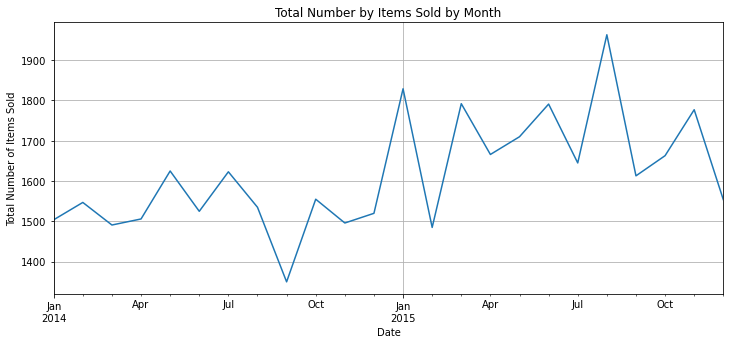

In [10]:
d.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [11]:
pip install plotly

You should consider upgrading via the '/Users/tanush/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


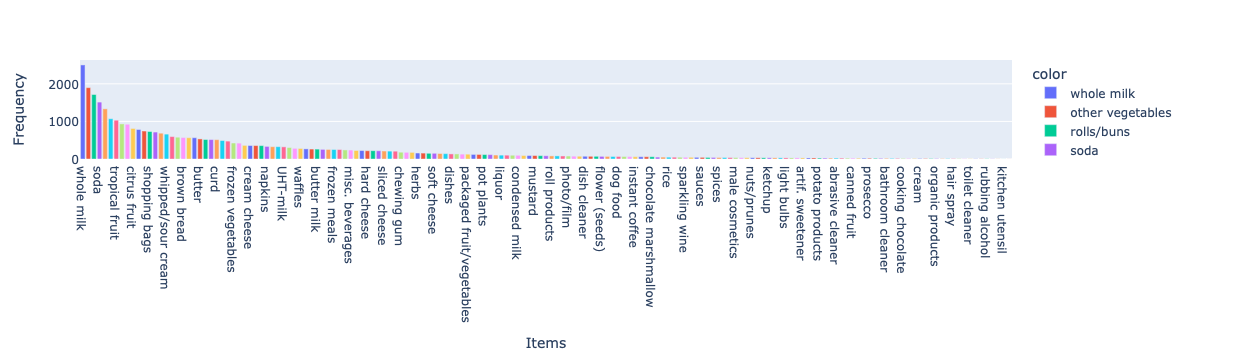

In [12]:
import plotly.express as px



fig = px.bar(data,x = data["itemDescription"].value_counts().keys(), y = data["itemDescription"].value_counts().values,color= data["itemDescription"].value_counts().keys()) 
fig.update_layout(
    xaxis_title= "Items",
    yaxis_title="Frequency",
)
    
fig.show()

In [13]:
data['itemDescription'].value_counts().values

array([2502, 1898, 1716, 1514, 1334, 1071, 1032,  933,  924,  812,  785,
        744,  731,  717,  687,  662,  596,  580,  571,  566,  566,  534,
        518,  516,  514,  491,  476,  425,  422,  362,  358,  357,  356,
        335,  327,  327,  323,  305,  283,  280,  269,  265,  263,  256,
        254,  252,  251,  240,  238,  227,  225,  220,  220,  219,  212,
        210,  208,  181,  177,  176,  159,  157,  152,  152,  146,  142,
        135,  134,  130,  128,  122,  121,  118,  116,  106,  103,  102,
        100,   98,   93,   92,   92,   89,   85,   82,   82,   80,   79,
         75,   74,   73,   72,   72,   70,   69,   67,   67,   66,   64,
         61,   60,   60,   60,   51,   50,   49,   48,   48,   46,   46,
         45,   44,   42,   41,   40,   40,   38,   37,   35,   34,   33,
         33,   32,   32,   31,   30,   29,   29,   29,   29,   27,   27,
         23,   22,   22,   22,   22,   21,   21,   20,   20,   19,   17,
         17,   17,   16,   16,   15,   15,   13,   

In [14]:
items = data.groupby(['Member_number', 'Date']).agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()
items

Member_number       Date  \
0               1000 2014-06-24   
1               1000 2015-03-15   
2               1000 2015-05-27   
3               1000 2015-07-24   
4               1000 2015-11-25   
...              ...        ...   
14958           4999 2015-05-16   
14959           4999 2015-12-26   
14960           5000 2014-09-03   
14961           5000 2014-11-16   
14962           5000 2015-10-02   

                                         itemDescription  
0                      [whole milk, pastry, salty snack]  
1      [sausage, whole milk, semi-finished bread, yog...  
2                             [soda, pickled vegetables]  
3                         [canned beer, misc. beverages]  
4                            [sausage, hygiene articles]  
...                                                  ...  
14958                  [butter milk, whipped/sour cream]  
14959                             [bottled water, herbs]  
14960                    [fruit/vegetable juice, onions]  
14961                   [bottled beer, other vegetables]  
14962       [soda, root vegetables, semi-finished bread]  

[14963 rows x 3 columns]

In [15]:
# one_hot = pd.get_dummies(data['itemDescription'])
# data.drop('itemDescription', inplace=True, axis=1)
# data = data.join(one_hot)
# data.head()


In [16]:
pip install mlxtend

You should consider upgrading via the '/Users/tanush/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from mlxtend.preprocessing import TransactionEncoder

In [18]:
new = items['itemDescription']

In [19]:
new = new.to_list()
new

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

In [20]:
te = TransactionEncoder()
te_ary = te.fit(new)
te_ary = te.transform(new)
te_ary


array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      False     False             False             False   
1                      False     False             False             False   
2                      False     False             False             False   
3                      False     False             False             False   
4                      False     False             False             False   
...                      ...       ...               ...               ...   
14958                  False     False             False             False   
14959                  False     False             False             False   
14960                  False     False             False             False   
14961                  False     False             False             False   
14962                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0               False  False          False             False  False    False   
1               False  False          False             False  False    False   
2               False  False          False             False  False    False   
3               False  False          False             False  False    False   
4               False  False          False             False  False    False   
...               ...    ...            ...               ...    ...      ...   
14958           False  False          False             False  False    False   
14959           False  False          False             False  False    False   
14960           False  False          False             False  False    False   
14961           False  False          False             False  False    False   
14962           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0      ...   False    False    False               False   False        False   
1      ...   False    False    False               False   False        False   
2      ...   False    False    False               False   False        False   
3      ...   False    False    False               False   False        False   
4      ...   False    False    False               False   False        False   
...    ...     ...      ...      ...                 ...     ...          ...   
14958  ...   False    False    False                True   False        False   
14959  ...   False    False    False               False   False        False   
14960  ...   False    False    False               False   False        False   
14961  ...   False    False    False               False   False        False   
14962  ...   False    False    False               False   False        False   

       white wine  whole milk  yogurt  zwieback  
0           False        True   False     False  
1           False        True    True     False  
2           False       False   False     False  
3           False       False   False     False  
4           False       False   False     False  
...           ...         ...     ...       ...  
14958       False       False   False     False  
14959       False       False   False     False  
14960       False       False   False     False  
14961       False       False   False     False  
14962       False       False   False     False  

[14963 rows x 167 columns]

In [22]:
pf = transactions.describe()
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)


In [23]:
pip install wordcloud

You should consider upgrading via the '/Users/tanush/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


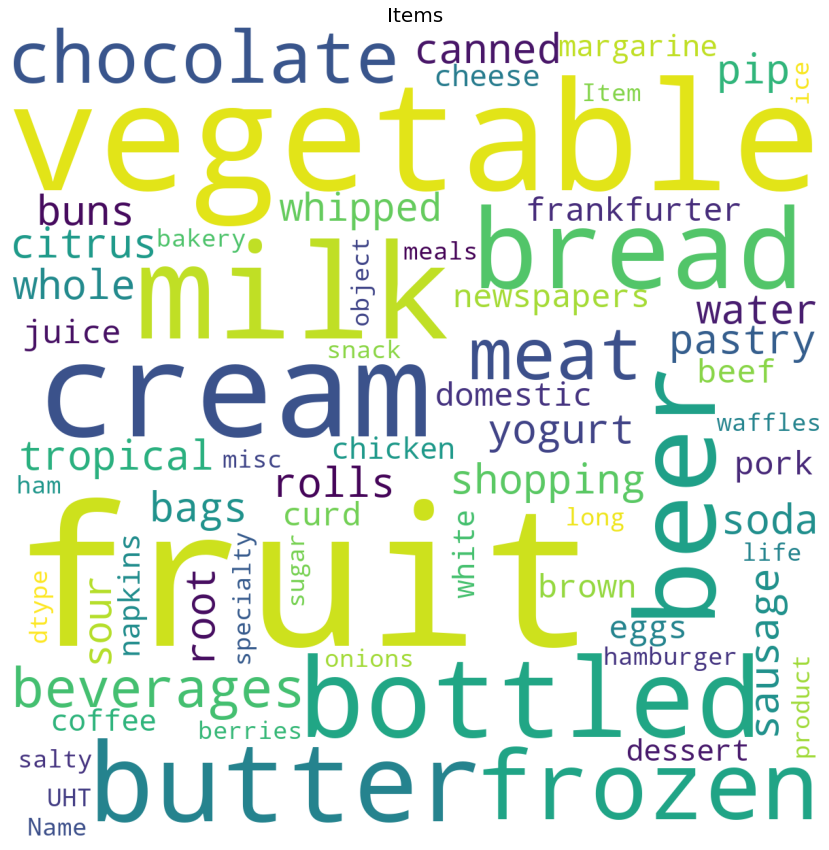

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

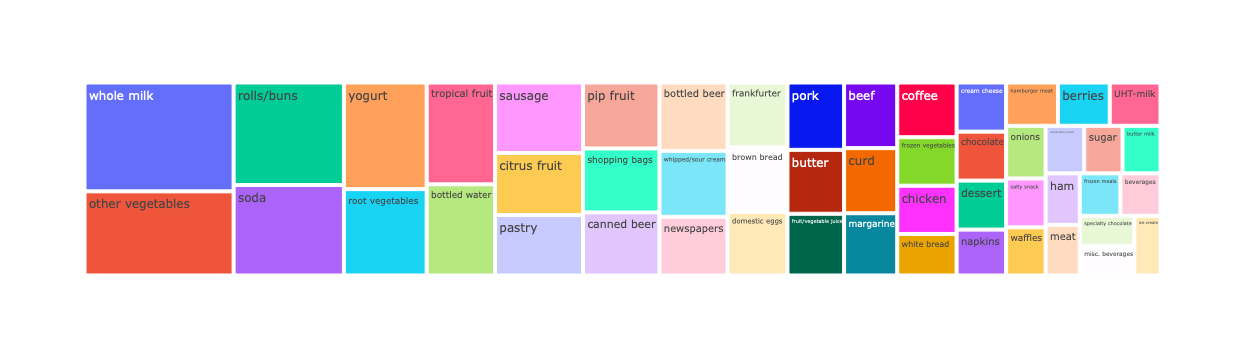

In [25]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

In [106]:
# min_support = 5/len(items)
min_support = 0.001

# compute the frequent itemsets using fpgrowth from mlxtend
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(transactions, min_support=min_support, use_colnames = True)

# print the frequent itemsets
# frequent_itemsets.sort_values(by = 'support', ascending = False)
print("Frequent itemsets using FP Growth Algorithm")
frequent_itemsets

Frequent itemsets using FP Growth Algorithm


support                         itemsets
0    0.157923                     (whole milk)
1    0.051728                         (pastry)
2    0.018780                    (salty snack)
3    0.085879                         (yogurt)
4    0.060349                        (sausage)
..        ...                              ...
745  0.001403            (yogurt, chewing gum)
746  0.001069  (other vegetables, chewing gum)
747  0.001002              (chewing gum, soda)
748  0.001069              (pasta, whole milk)
749  0.001002  (seasonal products, rolls/buns)

[750 rows x 2 columns]

In [107]:
from mlxtend.frequent_patterns import association_rules

# compute and print the association rules for fp growth

# association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
associations_fp_growth = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Association Rules obtained using FP Growth")
associations_fp_growth

Association Rules obtained using FP Growth


antecedents          consequents  antecedent support  \
0              (sausage)             (pastry)            0.060349   
1               (pastry)            (sausage)            0.051728   
2              (sausage)        (salty snack)            0.060349   
3          (salty snack)            (sausage)            0.018780   
4          (salty snack)        (canned beer)            0.018780   
..                   ...                  ...                 ...   
235     (tropical fruit)           (cat food)            0.067767   
236             (yogurt)        (chewing gum)            0.085879   
237        (chewing gum)             (yogurt)            0.012030   
238  (seasonal products)         (rolls/buns)            0.007084   
239         (rolls/buns)  (seasonal products)            0.110005   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.051728  0.003208    0.053156  1.027617  0.000086    1.001509  
1              0.060349  0.003208    0.062016  1.027617  0.000086    1.001777  
2              0.018780  0.001136    0.018826  1.002475  0.000003    1.000047  
3              0.060349  0.001136    0.060498  1.002475  0.000003    1.000159  
4              0.046916  0.001002    0.053381  1.137802  0.000121    1.006830  
..                  ...       ...         ...       ...       ...         ...  
235            0.011829  0.001002    0.014793  1.250543  0.000201    1.003008  
236            0.012030  0.001403    0.016342  1.358508  0.000370    1.004384  
237            0.085879  0.001403    0.116667  1.358508  0.000370    1.034855  
238            0.110005  0.001002    0.141509  1.286395  0.000223    1.036698  
239            0.007084  0.001002    0.009113  1.286395  0.000223    1.002048  

[240 rows x 9 columns]

In [143]:
# new_file = open('associations','w')

# for association in associations_fp_growth:
#       new_file.write(str(association))
#       new_file.write('\n')
# new_file.close()
associations_fp_growth.to_csv('associations.csv')

In [108]:
print("length of items is", len(items))

length of items is 14963


In [110]:
from mlxtend.frequent_patterns import apriori

#compute frequent itemsets for apriori

# min_support=5/len(items)

# min_support = 0.001

freq_items_apriori = apriori(transactions, min_support=min_support, use_colnames=True, verbose=1)
# freq_items_apriori.sort_values(by = 'support', ascending = False)

print("Frequent itemsets using Apriori Algorithm")
freq_items_apriori

Processing 28 combinations | Sampling itemset size 4e 3
Frequent itemsets using Apriori Algorithm


support                           itemsets
0    0.004010            (Instant food products)
1    0.021386                         (UHT-milk)
2    0.001470                 (abrasive cleaner)
3    0.001938                 (artif. sweetener)
4    0.008087                    (baking powder)
..        ...                                ...
745  0.001136  (whole milk, sausage, rolls/buns)
746  0.001002     (soda, whole milk, rolls/buns)
747  0.001337   (yogurt, whole milk, rolls/buns)
748  0.001069        (soda, sausage, whole milk)
749  0.001470      (yogurt, sausage, whole milk)

[750 rows x 2 columns]

In [139]:
#compute association rtules for apriori

print("Association Rules using Apriori Algorithm")
# association_rules_apriori = association_rules(freq_items_apriori, metric="lift", min_threshold=1)
associations_apriori = association_rules(freq_items_apriori, metric="lift", min_threshold=1)
associations_apriori

Association Rules using Apriori Algorithm


antecedents            consequents  antecedent support  \
0         (tropical fruit)             (UHT-milk)            0.067767   
1               (UHT-milk)       (tropical fruit)            0.021386   
2                   (beef)          (brown bread)            0.033950   
3            (brown bread)                 (beef)            0.037626   
4                   (beef)         (citrus fruit)            0.033950   
..                     ...                    ...                 ...   
235   (yogurt, whole milk)              (sausage)            0.011161   
236  (sausage, whole milk)               (yogurt)            0.008955   
237               (yogurt)  (sausage, whole milk)            0.085879   
238              (sausage)   (yogurt, whole milk)            0.060349   
239           (whole milk)      (yogurt, sausage)            0.157923   

     consequent support   support  confidence      lift      leverage  \
0              0.021386  0.001537    0.022682  1.060617  8.785064e-05   
1              0.067767  0.001537    0.071875  1.060617  8.785064e-05   
2              0.037626  0.001537    0.045276  1.203301  2.597018e-04   
3              0.033950  0.001537    0.040853  1.203301  2.597018e-04   
4              0.053131  0.001804    0.053150  1.000349  6.297697e-07   
..                  ...       ...         ...       ...           ...   
235            0.060349  0.001470    0.131737  2.182917  7.967480e-04   
236            0.085879  0.001470    0.164179  1.911760  7.012151e-04   
237            0.008955  0.001470    0.017121  1.911760  7.012151e-04   
238            0.011161  0.001470    0.024363  2.182917  7.967480e-04   
239            0.005748  0.001470    0.009310  1.619866  5.626300e-04   

     conviction  
0      1.001326  
1      1.004426  
2      1.008012  
3      1.007196  
4      1.000020  
..          ...  
235    1.082219  
236    1.093681  
237    1.008307  
238    1.013532  
239    1.003596  

[240 rows x 9 columns]

In [137]:
#Association based on confidence

print("Association Rules based on confidence")
# association_rules_apriori = association_rules(freq_items_apriori, metric="lift", min_threshold=1)
confidence_associations = association_rules(freq_items_apriori, metric="confidence", min_threshold=0.01)
confidence_associations

Association Rules based on confidence


antecedents            consequents  antecedent support  \
0                (UHT-milk)        (bottled water)            0.021386   
1           (bottled water)             (UHT-milk)            0.060683   
2        (other vegetables)             (UHT-milk)            0.122101   
3                (UHT-milk)     (other vegetables)            0.021386   
4                (UHT-milk)           (rolls/buns)            0.021386   
...                     ...                    ...                 ...   
1195      (yogurt, sausage)           (whole milk)            0.005748   
1196   (yogurt, whole milk)              (sausage)            0.011161   
1197  (sausage, whole milk)               (yogurt)            0.008955   
1198               (yogurt)  (sausage, whole milk)            0.085879   
1199              (sausage)   (yogurt, whole milk)            0.060349   

      consequent support   support  confidence      lift  leverage  conviction  
0               0.060683  0.001069    0.050000  0.823954 -0.000228    0.988755  
1               0.021386  0.001069    0.017621  0.823954 -0.000228    0.996168  
2               0.021386  0.002139    0.017515  0.818993 -0.000473    0.996060  
3               0.122101  0.002139    0.100000  0.818993 -0.000473    0.975443  
4               0.110005  0.001804    0.084375  0.767013 -0.000548    0.972009  
...                  ...       ...         ...       ...       ...         ...  
1195            0.157923  0.001470    0.255814  1.619866  0.000563    1.131541  
1196            0.060349  0.001470    0.131737  2.182917  0.000797    1.082219  
1197            0.085879  0.001470    0.164179  1.911760  0.000701    1.093681  
1198            0.008955  0.001470    0.017121  1.911760  0.000701    1.008307  
1199            0.011161  0.001470    0.024363  2.182917  0.000797    1.013532  

[1200 rows x 9 columns]

In [118]:
final_basket = associations_fp_growth
final_basket

antecedents          consequents  antecedent support  \
0              (sausage)             (pastry)            0.060349   
1               (pastry)            (sausage)            0.051728   
2              (sausage)        (salty snack)            0.060349   
3          (salty snack)            (sausage)            0.018780   
4          (salty snack)        (canned beer)            0.018780   
..                   ...                  ...                 ...   
235     (tropical fruit)           (cat food)            0.067767   
236             (yogurt)        (chewing gum)            0.085879   
237        (chewing gum)             (yogurt)            0.012030   
238  (seasonal products)         (rolls/buns)            0.007084   
239         (rolls/buns)  (seasonal products)            0.110005   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.051728  0.003208    0.053156  1.027617  0.000086    1.001509  
1              0.060349  0.003208    0.062016  1.027617  0.000086    1.001777  
2              0.018780  0.001136    0.018826  1.002475  0.000003    1.000047  
3              0.060349  0.001136    0.060498  1.002475  0.000003    1.000159  
4              0.046916  0.001002    0.053381  1.137802  0.000121    1.006830  
..                  ...       ...         ...       ...       ...         ...  
235            0.011829  0.001002    0.014793  1.250543  0.000201    1.003008  
236            0.012030  0.001403    0.016342  1.358508  0.000370    1.004384  
237            0.085879  0.001403    0.116667  1.358508  0.000370    1.034855  
238            0.110005  0.001002    0.141509  1.286395  0.000223    1.036698  
239            0.007084  0.001002    0.009113  1.286395  0.000223    1.002048  

[240 rows x 9 columns]

In [119]:
final_basket.loc[:,"antecedent_list"] = [list(item) for item in final_basket["antecedents"]].copy()
final_basket.loc[:,"antecedent_list_1"] = [", ".join(item) for item in final_basket["antecedents"]].copy()

final_basket.loc[:,"consequent_list"] = [list(item) for item in final_basket["consequents"]].copy()
final_basket.loc[:,"consequent_list_1"] = ["".join(item) for item in final_basket["consequent_list"]].copy()

final_basket.sort_values("conviction", ascending = False, inplace = True)
final_basket.head()

/Users/tanush/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



antecedents       consequents  antecedent support  \
16       (yogurt, sausage)      (whole milk)            0.005748   
18   (sausage, whole milk)          (yogurt)            0.008955   
17    (yogurt, whole milk)         (sausage)            0.011161   
22   (sausage, rolls/buns)      (whole milk)            0.005347   
134                (flour)  (tropical fruit)            0.009757   

     consequent support   support  confidence      lift  leverage  conviction  \
16             0.157923  0.001470    0.255814  1.619866  0.000563    1.131541   
18             0.085879  0.001470    0.164179  1.911760  0.000701    1.093681   
17             0.060349  0.001470    0.131737  2.182917  0.000797    1.082219   
22             0.157923  0.001136    0.212500  1.345594  0.000292    1.069304   
134            0.067767  0.001069    0.109589  1.617141  0.000408    1.046969   

           antecedent_list    antecedent_list_1   consequent_list  \
16       [yogurt, sausage]      yogurt, sausage      [whole milk]   
18   [sausage, whole milk]  sausage, whole milk          [yogurt]   
17    [yogurt, whole milk]   yogurt, whole milk         [sausage]   
22   [sausage, rolls/buns]  sausage, rolls/buns      [whole milk]   
134                [flour]                flour  [tropical fruit]   

    consequent_list_1  
16         whole milk  
18             yogurt  
17            sausage  
22         whole milk  
134    tropical fruit

In [82]:
pip install -U seaborn

     |████████████████████████████████| 292 kB 491 kB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
You should consider upgrading via the '/Users/tanush/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


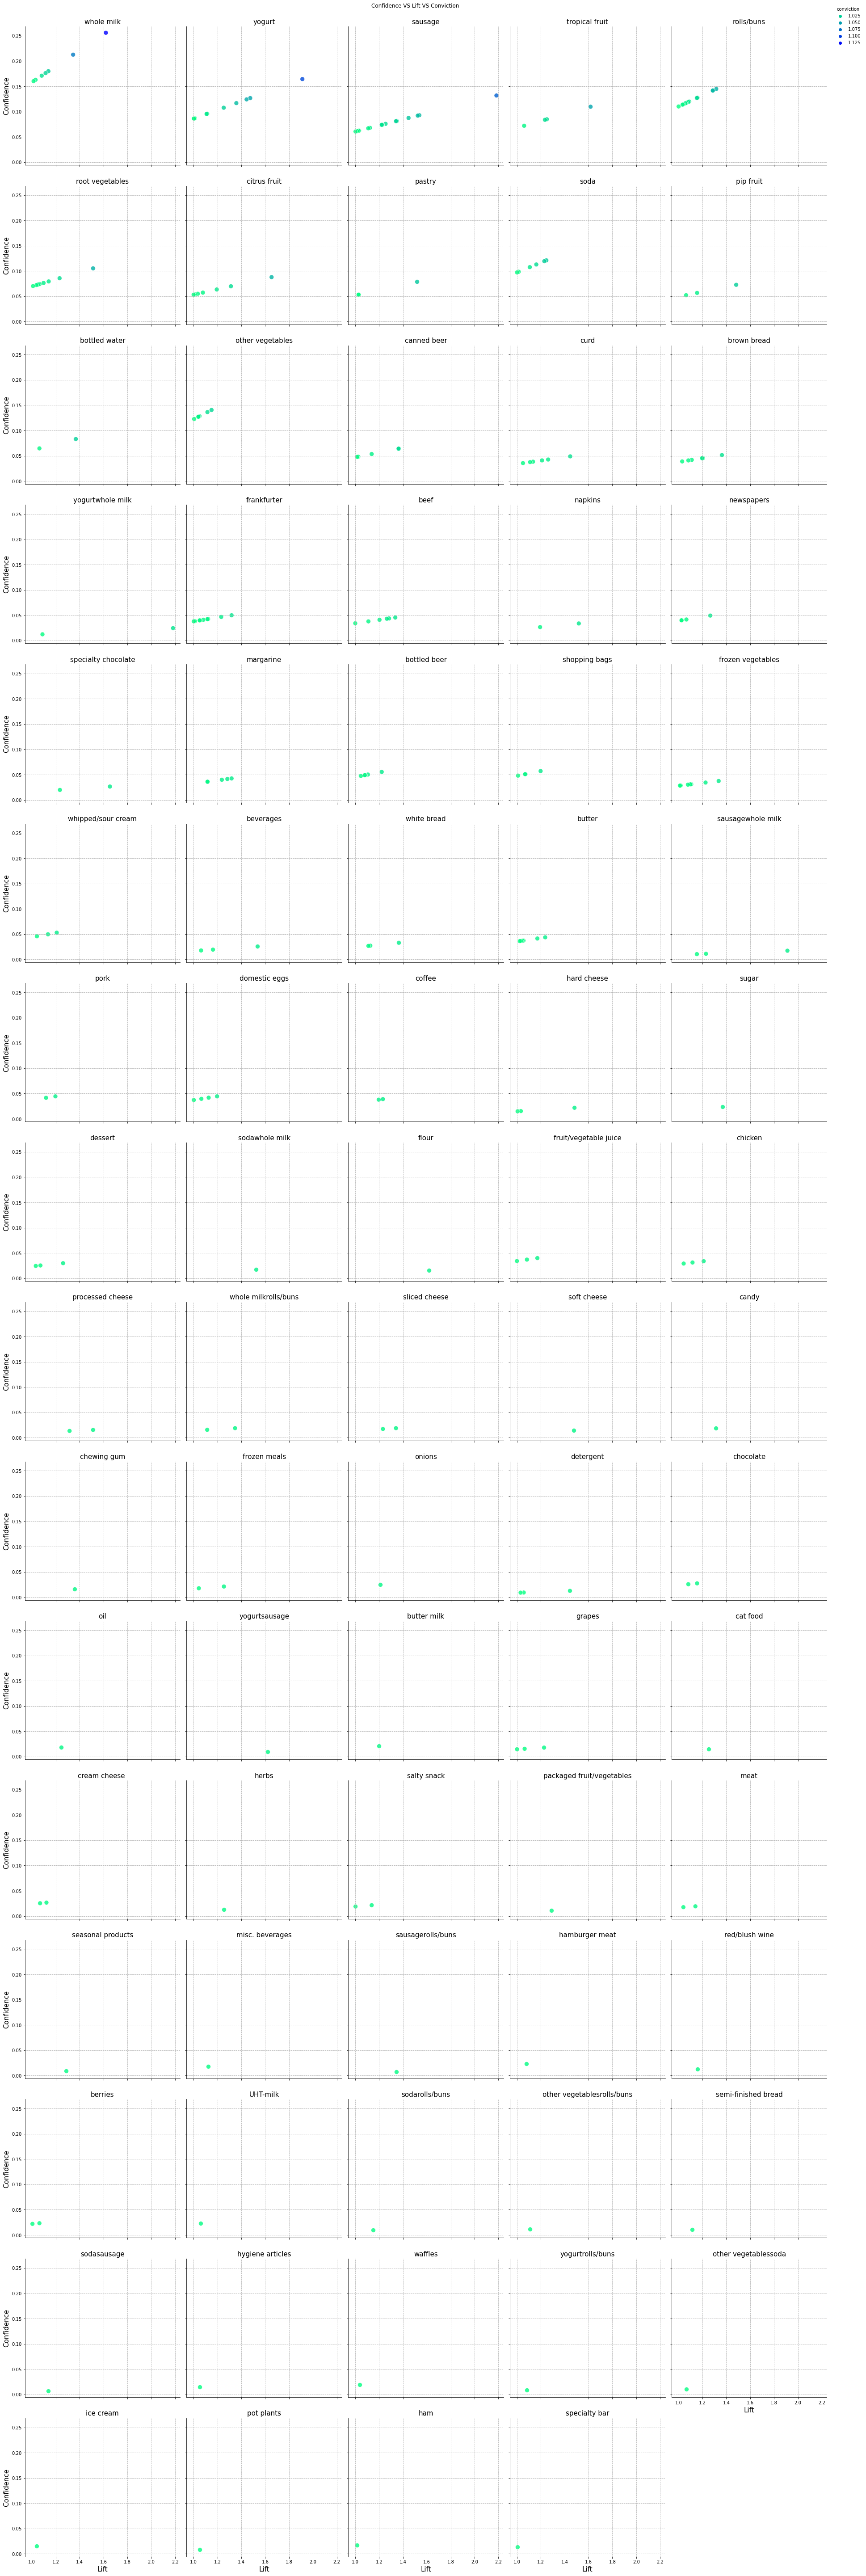

In [120]:
g = sns.relplot(data = final_basket, 
           x = "lift", y = "confidence", 
           col = "consequent_list_1", 
           col_wrap = 5, 
           hue = "conviction", 
           s = 100, 
           alpha = 0.8,
           palette = "winter_r")

axes = g.axes.flatten()

g.set_xlabels("Lift", size = 15)
g.set_ylabels("Confidence", size = 15)

title = final_basket["consequent_list_1"].unique().tolist()

#set grid style for all axes 
for i in range(len(title)):
    axes[i].grid(ls='dashed')
    axes[i].set_title(title[i], size = 15)

g.fig.suptitle('Confidence VS Lift VS Conviction', y = 1)

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

#Performance Comparison Between Apriori and FP Growth Algorithms

In [124]:
import time

In [125]:
def perform_rule_calculation(transact_items_matrix, rule_type, min_support=0.001):
    """
    excution time for the corresponding algorithm
        
    """
    start_time = 0
    total_execution = 0

    if(rule_type=="fpmax"):
        start_time = time.time()
        rule_items = fpmax(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp max! ")
        print(rule_type)
        
    if(rule_type=="apriori"):
        start_time = time.time()
        rule_items =apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori !")
        print(rule_type)
        
    if(rule_type == "Fpgrowth"):
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth !")
        print(rule_type)
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [126]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    shows the relationship between the two input columns 
   
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [127]:
def compare_time_exec(algo1=list, algo2=list):
    """
        - Algo1 list contains first algo details.
            
        - Algo2 list having the details of second algorithm
        
        - Algo3 list have the data of third algorithm
    """
    
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()
    print("Fianls Results")

In [128]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(transactions, rule_type='Fpgrowth') # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth !
Fpgrowth
Fp Growth execution took: 0.12564396858215332 seconds


In [129]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(transactions, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori !
apriori
Apriori Execution took: 1.5537090301513672 seconds


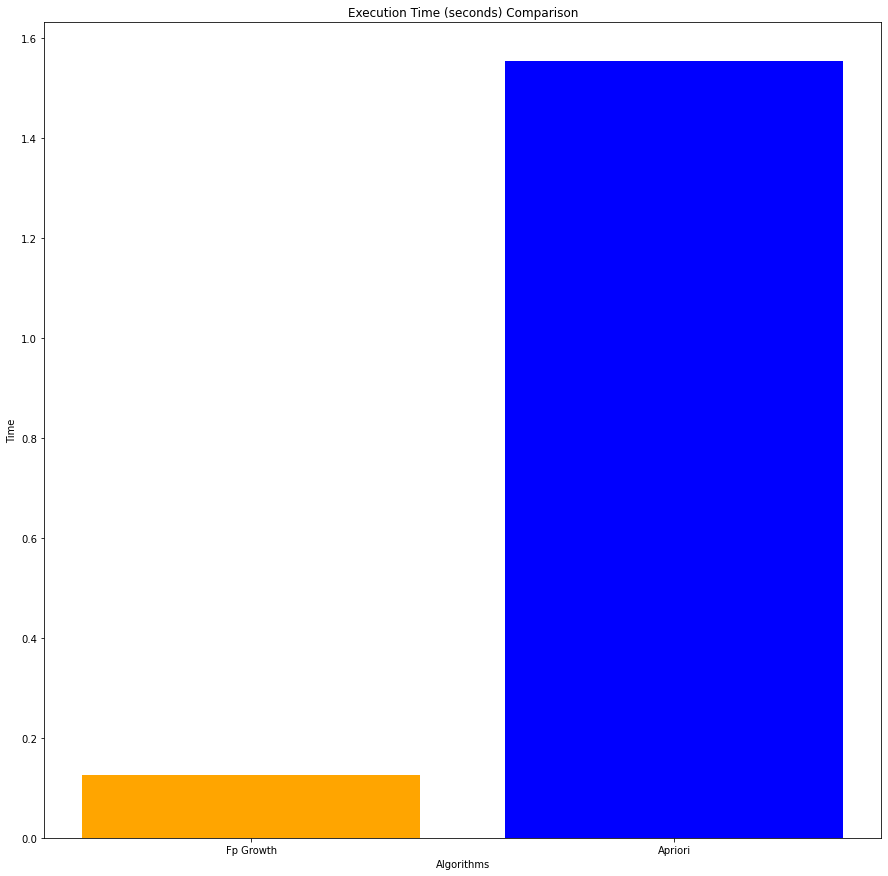

Fianls Results


In [130]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]


compare_time_exec(algo1, algo2)

Performance Comparison Alternative Approach

In [131]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True, low_memory=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    return total_execution

In [132]:
n_range = range(1, 10, 1)
list_time_ap = []
list_time_fp = []
for n in n_range:
    time_ap = 0
    time_fp = 0
    min_sup = float(n/100)
    time_ap = perform_rule_calculation(transactions, rule_type="fpgrowth", min_support=min_sup)
    time_fp = perform_rule_calculation(transactions, rule_type="aprior", min_support=min_sup)
    list_time_ap.append(time_ap)
    list_time_fp.append(time_fp)

Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!


In [133]:
list_time_ap

[0.09869599342346191,
 0.05618929862976074,
 0.05040693283081055,
 0.042310237884521484,
 0.040203094482421875,
 0.040255069732666016,
 0.03739190101623535,
 0.03738689422607422,
 0.03609180450439453]

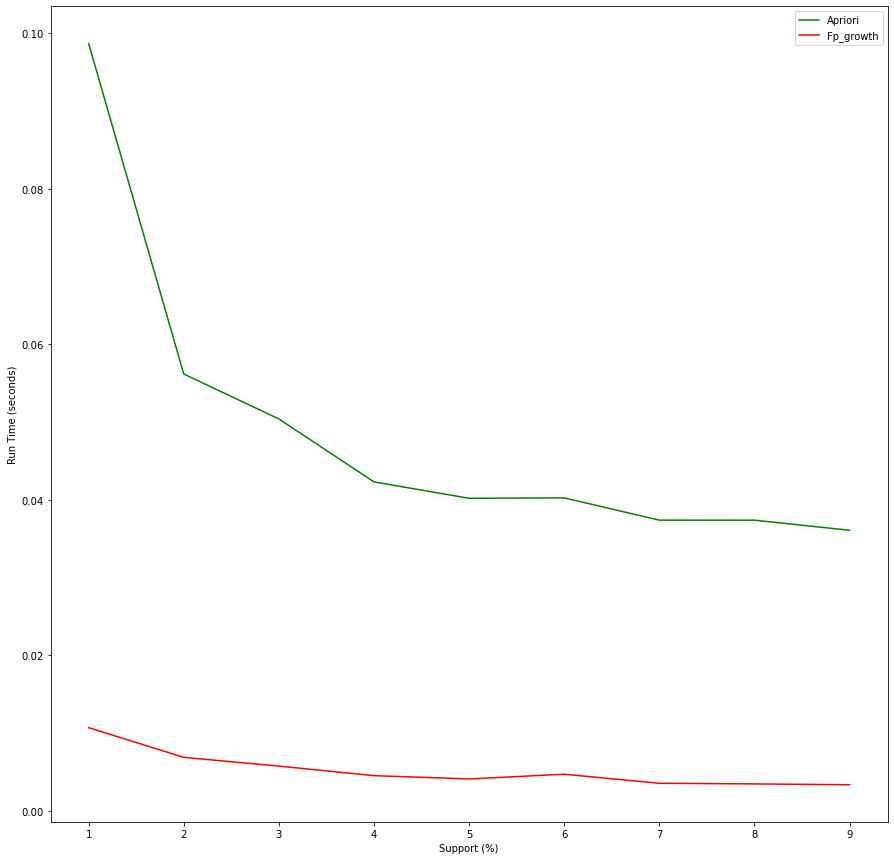

In [134]:
import matplotlib.pyplot as plt

plt.plot(n_range, list_time_ap, label='Apriori', color='green')
plt.plot(n_range, list_time_fp, label='Fp_growth', color='red')
plt.xlabel("Support (%)")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="best")
plt.show()